<a href="https://colab.research.google.com/github/bannis14/Portfolio-Projects/blob/main/Time_Series_Forecast/Sarimax_Model_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries and Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00


In [ ]:

# change directory
%cd /content/drive/MyDrive/Time Series Forecasting Product

/content/drive/MyDrive/Time Series Forecasting Product


In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
import pmdarima as pm
from pmdarima import model_selection

In [ ]:
# Load the data
# YYYY-MM-DD
df = pd.read_csv('nyc_data.csv', index_col=0, parse_dates=True)
future_df = pd.read_csv('future.csv', index_col=0, parse_dates=True)
future_df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2021-01-01,NaN,0,0,0,5.00,154.221
2021-01-02,NaN,0,0,0,11.11,264.805
2021-01-03,NaN,0,0,0,3.89,115.499
2021-01-04,NaN,0,0,0,6.67,124.650
2021-01-05,NaN,0,0,0,5.56,77.968


In [ ]:
# Rename variable
df = df.rename(columns={'Demand': 'y'})
df.head(0)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,


In [ ]:
# Extract regressors
train_X = df.iloc[:, 1:]
future_X = future_df.iloc[:, 1:]

In [ ]:
future_X.head(0)

,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,


## SARIMAX model

In [ ]:
## get the best params
parameters = pd.read_csv("Forecasting Product/best_params_sarimax.csv", index_col=0)
parameters

,31
D,1.000000
P,1.000000
Q,1.000000
d,1.000000
p,1.000000
q,1.000000
rmse,59.955275


In [ ]:
## Store the individual Parameters somewhere
p = parameters.loc['p'][0]
d = parameters.loc['d'][0]
q = parameters.loc['q'][0]
P = parameters.loc['P'][0]
D = parameters.loc['D'][0]
Q = parameters.loc['Q'][0]

In [ ]:
# Model

model = pm.ARIMA(order=(p, d, q),
                 seasonal_order=(P, D, Q, 7),
                 X=train_X,
                 suppress_warning=True,
                 force_stationarity=False)

In [ ]:
model.fit(df.y)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['X', 'suppress_warning', 'force_stationarity']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


ARIMA(order=(1.0, 1.0, 1.0), seasonal_order=(1.0, 1.0, 1.0, 7))

##Forecasting

In [ ]:
# Predictions
predictions_sarimax = pd.Series(model.predict(n_periods=len(future_df),
                                               X=future_X)).rename("sarimax")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['X', 'suppress_warning', 'force_stationarity']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
predictions_sarimax.index = future_df.index
predictions_sarimax

Date
2021-01-01    739.874432
2021-01-02    856.312084
2021-01-03    767.567530
2021-01-04    907.626374
2021-01-05    779.803536
2021-01-06    926.955663
2021-01-07    822.041158
2021-01-08    738.456697
2021-01-09    853.690317
2021-01-10    772.663628
2021-01-11    902.978208
2021-01-12    776.464312
2021-01-13    931.365572
2021-01-14    824.678396
2021-01-15    738.851949
2021-01-16    854.017405
2021-01-17    773.428101
2021-01-18    903.190593
2021-01-19    776.750928
2021-01-20    932.091346
2021-01-21    825.303783
2021-01-22    739.350357
2021-01-23    854.512011
2021-01-24    773.947552
2021-01-25    903.678821
2021-01-26    777.243424
2021-01-27    932.608786
2021-01-28    825.815596
2021-01-29    739.855036
2021-01-30    855.016535
2021-01-31    774.453544
Name: sarimax, dtype: float64

<Axes: xlabel='Date'>

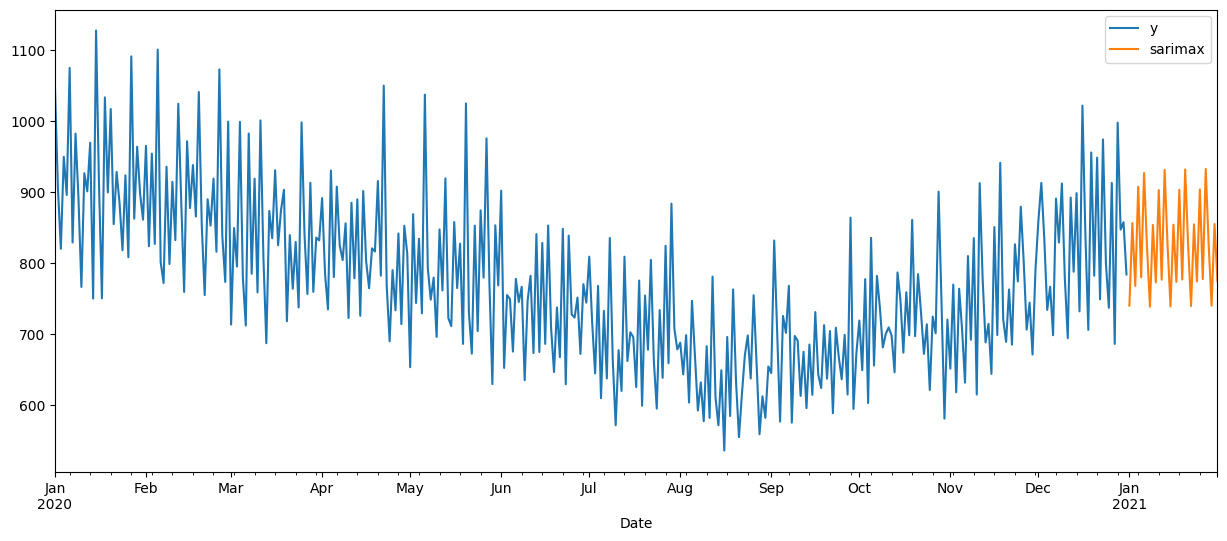

In [ ]:
# Visualization
df['y']['2020-01-01':].plot(figsize=(15, 6), legend=True)
predictions_sarimax.plot(legend=True)

In [ ]:
# Exporting
predictions_sarimax.to_csv("Forecasting Product/Ensemble/predictions_sarimax.csv")